In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/codophobia/CricketScorePredictor/master/data/ipl.csv')
data.tail()

data.describe()

data.info()

data.dtypes

data.isnull().any()
data.columns
final_data = data[['total','date', 'bat_team', 'bowl_team',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5']]

final_data.head()

teams = final_data['bat_team'].unique()
teams

consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

print('shape of data before',final_data.shape)
final_data = final_data[(final_data['bat_team'].isin(consistent_teams)) & (final_data['bowl_team'].isin(consistent_teams))]
print('shape of data after',final_data.shape)


final_data['bat_team'].unique()

print('before shape of data',final_data.shape)
final_data = final_data[final_data['overs']>=5.0]
print('before shape of data',final_data.shape)


final_data.head()

from datetime import datetime
final_data['date'] = final_data['date'].apply(lambda x :datetime.strptime(x,'%Y-%m-%d'))

final_data['date'].dt.day_name().value_counts()

import matplotlib.pyplot as plt
import seaborn as sns
corr_mat = final_data.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(15,8))
g=sns.heatmap(final_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

data = pd.get_dummies(data = final_data,columns = ['bat_team','bowl_team'])
data.head()

data.columns

data.shape

x_train = data.drop(labels='total',axis=1)[data['date'].dt.year<=2016]
x_test =  data.drop(labels='total',axis=1)[data['date'].dt.year>=2017]
y_train = data[data['date'].dt.year<=2016]['total'].values
y_test =  data[data['date'].dt.year>=2017]['total'].values

x_train.drop(columns='date',inplace=True,axis=1)
x_test.drop(columns='date',inplace=True,axis=1)

print("Training set: {} and Test set: {}".format(x_train.shape, x_test.shape))

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train,y_train)
y_pred_lr = linear_regressor.predict(x_test)

from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse ,accuracy_score
import numpy as np
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_lr)
print(score)

from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state =0)
clf.fit(x_train,y_train)

accuracy = clf.score(x_test,y_test)
print(accuracy*100,'%')

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

rf_predict = rf.predict(x_test)

from sklearn.metrics import r2_score
score = r2_score(y_test,rf_predict)
print(score)

since linear regression gives the highest accuracy , we choose this model.

def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(linear_regressor.predict(temp_array)[0])


Prediction 1 • Date: 16th April 2018 • IPL : Season 11 • Match number: 13 • Teams: Kolkata Knight Riders vs. Delhi Daredevils • First Innings final score: 200/9

final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', overs=9.2, runs=79, wickets=2, runs_in_prev_5=60, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

Prediction 2 • Date: 7th May 2018 • IPL : Season 11 • Match number: 39 • Teams: Sunrisers Hyderabad vs. Royal Challengers Bangalore • First Innings final score: 146/10

final_score = predict_score(batting_team='Sunrisers Hyderabad', bowling_team='Royal Challengers Bangalore', overs=10.5, runs=67, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

Prediction 3 • Date: 17th May 2018 • IPL : Season 11 • Match number: 50 • Teams: Mumbai Indians vs. Kings XI Punjab • First Innings final score: 186/8

final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=14.1, runs=136, wickets=4, runs_in_prev_5=50, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

Prediction 4 • Date: 30th March 2019 • IPL : Season 12 • Match number: 9 • Teams: Mumbai Indians vs. Kings XI Punjab • First Innings final score: 176/7

final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=12.3, runs=113, wickets=2, runs_in_prev_5=55, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

Prediction 5 • Date: 11th April 2019 • IPL : Season 12 • Match number: 25 • Teams: Rajasthan Royals vs. Chennai Super Kings • First Innings final score: 151/7

final_score = predict_score(batting_team='Rajasthan Royals', bowling_team='Chennai Super Kings', overs=13.3, runs=92, wickets=5, runs_in_prev_5=27, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

Prediction 6 • Date: 14th April 2019 • IPL : Season 12 • Match number: 30 • Teams: Sunrisers Hyderabad vs. Delhi Daredevils • First Innings final score: 155/7

final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Sunrisers Hyderabad', overs=11.5, runs=98, wickets=3, runs_in_prev_5=41, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

import pickle
file = open('linear_regressor_score_.pkl','wb')
pickle.dump(linear_regressor,file)



In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/codophobia/CricketScorePredictor/master/data/ipl.csv')
data.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


In [2]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [4]:
data.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [5]:
data.isnull().any()
data.columns
final_data = data[['total','date', 'bat_team', 'bowl_team',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5']]

In [6]:
final_data.head()

,total,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5
0,222,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0
1,222,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0
2,222,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0
3,222,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0
4,222,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0


In [11]:
teams = final_data['bat_team'].unique()
teams

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [10]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [8]:

print('shape of data before',final_data.shape)
final_data = final_data[(final_data['bat_team'].isin(consistent_teams)) & (final_data['bowl_team'].isin(consistent_teams))]
print('shape of data after',final_data.shape)

shape of data before (76014, 9)
shape of data after (53811, 9)


In [9]:
final_data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [12]:
print('before shape of data',final_data.shape)
final_data = final_data[final_data['overs']>=5.0]
print('before shape of data',final_data.shape)

before shape of data (53811, 9)
before shape of data (40108, 9)


In [13]:
final_data.head()

,total,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5
32,222,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0
33,222,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1
34,222,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1
35,222,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1
36,222,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1


In [14]:
from datetime import datetime
final_data['date'] = final_data['date'].apply(lambda x :datetime.strptime(x,'%Y-%m-%d'))

In [15]:
final_data['date'].dt.day_name().value_counts()

Sunday       7484
Saturday     7437
Wednesday    5875
Friday       5242
Tuesday      5118
Monday       4634
Thursday     4318
Name: date, dtype: int64

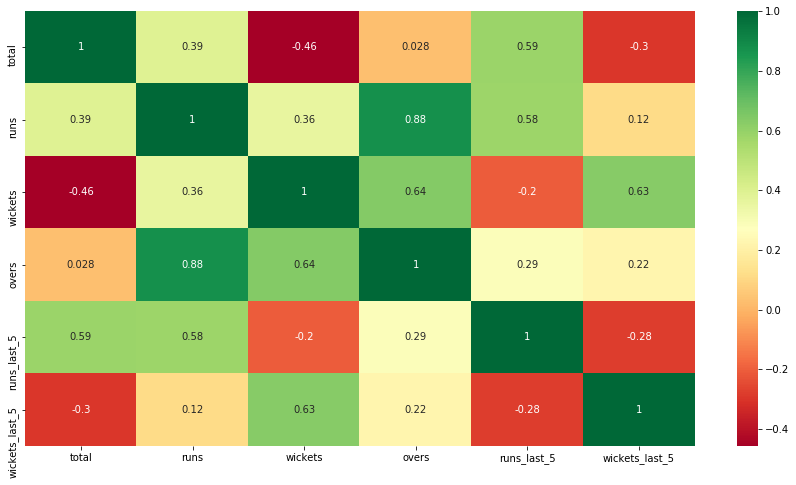

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns
corr_mat = final_data.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(15,8))
g=sns.heatmap(final_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
data = pd.get_dummies(data = final_data,columns = ['bat_team','bowl_team'])
data.head()

,total,date,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,222,2008-04-18,61,0,5.1,59,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,222,2008-04-18,61,1,5.2,59,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,222,2008-04-18,61,1,5.3,59,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,222,2008-04-18,61,1,5.4,59,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,222,2008-04-18,61,1,5.5,58,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
data.columns

Index(['total', 'date', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [19]:
data.shape

(40108, 23)

In [21]:
x_train = data.drop(labels='total',axis=1)[data['date'].dt.year<=2016]
x_test =  data.drop(labels='total',axis=1)[data['date'].dt.year>=2017]
y_train = data[data['date'].dt.year<=2016]['total'].values
y_test =  data[data['date'].dt.year>=2017]['total'].values

x_train.drop(columns='date',inplace=True,axis=1)
x_test.drop(columns='date',inplace=True,axis=1)


In [22]:
print("Training set: {} and Test set: {}".format(x_train.shape, x_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


In [23]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train,y_train)
y_pred_lr = linear_regressor.predict(x_test)

In [24]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse ,accuracy_score
import numpy as np
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.118617546193233
Mean Squared Error (MSE): 251.00792310417296
Root Mean Squared Error (RMSE): 15.843229566732061


In [25]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_lr)
print(score)

0.7522633566350541


In [26]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state =0)
clf.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [27]:

accuracy = clf.score(x_test,y_test)
print(accuracy*100,'%')

47.808430722325994 %


In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

rf_predict = rf.predict(x_test)

In [29]:
from sklearn.metrics import r2_score
score = r2_score(y_test,rf_predict)
print(score)

0.6707191240017739


In [30]:
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor()
ar.fit(x_train,y_train)
ar_predict = ar.predict(x_test) 

In [31]:
from sklearn.metrics import r2_score
score = r2_score(y_test,ar_predict)
print(score)

0.5369876554632977


since linear regression gives the highest accuracy , we choose this model.

In [32]:

def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(linear_regressor.predict(temp_array)[0])

Prediction 1 • Date: 16th April 2018 • IPL : Season 11 • Match number: 13 • Teams: Kolkata Knight Riders vs. Delhi Daredevils • First Innings final score: 200/9

In [33]:
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', overs=9.2, runs=79, wickets=2, runs_in_prev_5=60, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 184 to 199


Prediction 2 • Date: 7th May 2018 • IPL : Season 11 • Match number: 39 • Teams: Sunrisers Hyderabad vs. Royal Challengers Bangalore • First Innings final score: 146/10

In [34]:
final_score = predict_score(batting_team='Sunrisers Hyderabad', bowling_team='Royal Challengers Bangalore', overs=10.5, runs=67, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 155 to 170


Prediction 3 • Date: 17th May 2018 • IPL : Season 11 • Match number: 50 • Teams: Mumbai Indians vs. Kings XI Punjab • First Innings final score: 186/8

In [35]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=14.1, runs=136, wickets=4, runs_in_prev_5=50, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 165 to 180


Prediction 5 • Date: 11th April 2019 • IPL : Season 12 • Match number: 25 • Teams: Rajasthan Royals vs. Chennai Super Kings • First Innings final score: 151/7

In [36]:
final_score = predict_score(batting_team='Rajasthan Royals', bowling_team='Chennai Super Kings', overs=13.3, runs=92, wickets=5, runs_in_prev_5=27, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 146 to 161


In [38]:
import pickle
file = open('linear_regressor_score_00.pkl','wb')
pickle.dump(linear_regressor,file)
file.close()